# Relax and take a bike ride! - Part I

Ecobici is a bicycle-sharing system, also known as a public bicycle scheme, in the Autonomous City of Buenos Aires. Its operation started in 2010 intending to promote a healthy and environmentally friendly transportation and to encourage the use of an alternative method which reduces traffic congestion. 

In 2018 the Buenos Aires legislature approved the concession of the system for ten years to Teambici, a Brazilian private enterprise. In February 2019, Teambici began with the renovation of the bicycles and installation of new stations to distributing 4000 bicycles across 400 stations in 38 neighborhoods.

There are several complains about the hard work to find an available bicycle. So, I have started a project with the aim to understand the usage pattern of the system, to predict in a simple way the bicycle demand and to identify which stations should be upgraded or moved. The project will be divided into four parts:

- Part I: Data acquisition and data cleaning
- Part II: Exploratory data analysis
- Part III: Bicycle demand model
- Part IV: Station clusteirng and insights




## Data acquisition and data cleaning

I have chosen the data set from 2019 because the pandemic situation has abruptly modified the transport behaviour in the city in 2020. 

The data set was download from the open data page of the Autonomous City of Buenos Aires. You can download it from [here](https://data.buenosaires.gob.ar/).

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"recorridos-realizados-2019.csv")

c:\users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,2,4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Summary

In [3]:
df.sample(5)

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
1361572,152721,NaN,NaN,2019-06-06 20:26:44,116,HOSPITAL ALEMÁN,Beruti y Ecuador,12.0,-34.592171,-58.402589,0 days 00:07:31.000000000,2019-06-06 20:34:15,202,FACULTAD DE DERECHO,"Figueroa Alcorta, Pres. Av. 2120",30.0,-34.583811,-58.390967,nuevo
3925883,56489,NaN,NaN,2019-09-14 13:20,90,090 - GUTIERREZ,"Gutierrez, Juan Maria 2685",20.0,-34.586632,-58.399875,0 days 01:12:24.000000000,2019-09-14 14:32,15,015 - JUANA MANSO II,"Manso Juana y De La Barra, Emma",20.0,-34.600400,-58.363671,antiguo
6116935,478905,NaN,NaN,2019-11-12 22:39,370,305 - Plaza Martin Rodriguez,Pareja 3016,20.0,-34.590964,-58.500336,0 days 00:34:17.000000000,2019-11-12 23:13,370,305 - Plaza Martin Rodriguez,Pareja 3016,20.0,-34.590964,-58.500336,antiguo
866689,177410,NaN,NaN,2019-05-20 08:31:38,248,Plaza Zapiola,Donado 2001,20.0,-34.573841,-58.474281,0 days 00:46:12.000000000,2019-05-20 09:17:50,248,Plaza Zapiola,Donado 2001,20.0,-34.573841,-58.474281,nuevo
979936,8037,NaN,NaN,2019-05-24 18:13:13,104,Federico Lacroze,Guzman Av. 1100,30.0,-34.587617,-58.455212,0 days 00:43:23.000000000,2019-05-24 18:56:36,91,Pasco,Pasco 708,20.0,-34.617448,-58.397602,nuevo


In [4]:
df.shape

(6367314, 19)

The data set has 6.367.314 entries and 19 columns. Each coloumn or variable represents the following information:

- id_usuario: intern codification to identify every user.
- edad_usario: user's age.
- genero_usuario: user's gender.
- fecha_origen_recorrido: start datetime for each ride.
- id_estación_origen: starting station id.
- nombre_estacion_origen: starting station name.
- dirección_estacion_origen: address of the starting station.
- capacidad_origen: max capacity of starting station.
- lat_estacion_origen: latitude of starting station.
- long_estacion_origen: longitude of starting station.
- duración_recorrido: duration in seconds of the ride.
- fecha_destini_recorrido: end datetime for each ride.
- id_estación_destino: ending station id.
- nombre_estacion_destino: ending station name.
- dirección_estacion_destino: address of the ending station.
- capacidad_destino: max capacity of ending station.
- lat_estacion_destino: latitude of ending station.
- long_estacion_destino: longitude of ending station.
- servicio: refers to the old or new system.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367314 entries, 0 to 6367313
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_usuario                  object 
 1   edad_usuario                float64
 2   genero_usuario              object 
 3   fecha_origen_recorrido      object 
 4   id_estacion_origen          object 
 5   nombre_estacion_origen      object 
 6   direccion_estacion_origen   object 
 7   capacidad_estacion_origen   float64
 8   lat_estacion_origen         float64
 9   long_estacion_origen        float64
 10  duracion_recorrido          object 
 11  fecha_destino_recorrido     object 
 12  id_estacion_destino         object 
 13  nombre_estacion_destino     object 
 14  direccion_estacion_destino  object 
 15  capacidad_estacion_destino  float64
 16  lat_estacion_destino        float64
 17  long_estacion_destino       float64
 18  servicio                    object 
dtypes: float64(7), object

#### Missing values

In [5]:
df.isna().sum()

id_usuario                          0
edad_usuario                  6163203
genero_usuario                6163203
fecha_origen_recorrido              0
id_estacion_origen              14697
nombre_estacion_origen              4
direccion_estacion_origen      129481
capacidad_estacion_origen      218804
lat_estacion_origen             16840
long_estacion_origen            16840
duracion_recorrido                149
fecha_destino_recorrido           151
id_estacion_destino             14807
nombre_estacion_destino             4
direccion_estacion_destino     129917
capacidad_estacion_destino     218914
lat_estacion_destino            17105
long_estacion_destino           17105
servicio                            4
dtype: int64

<AxesSubplot:>

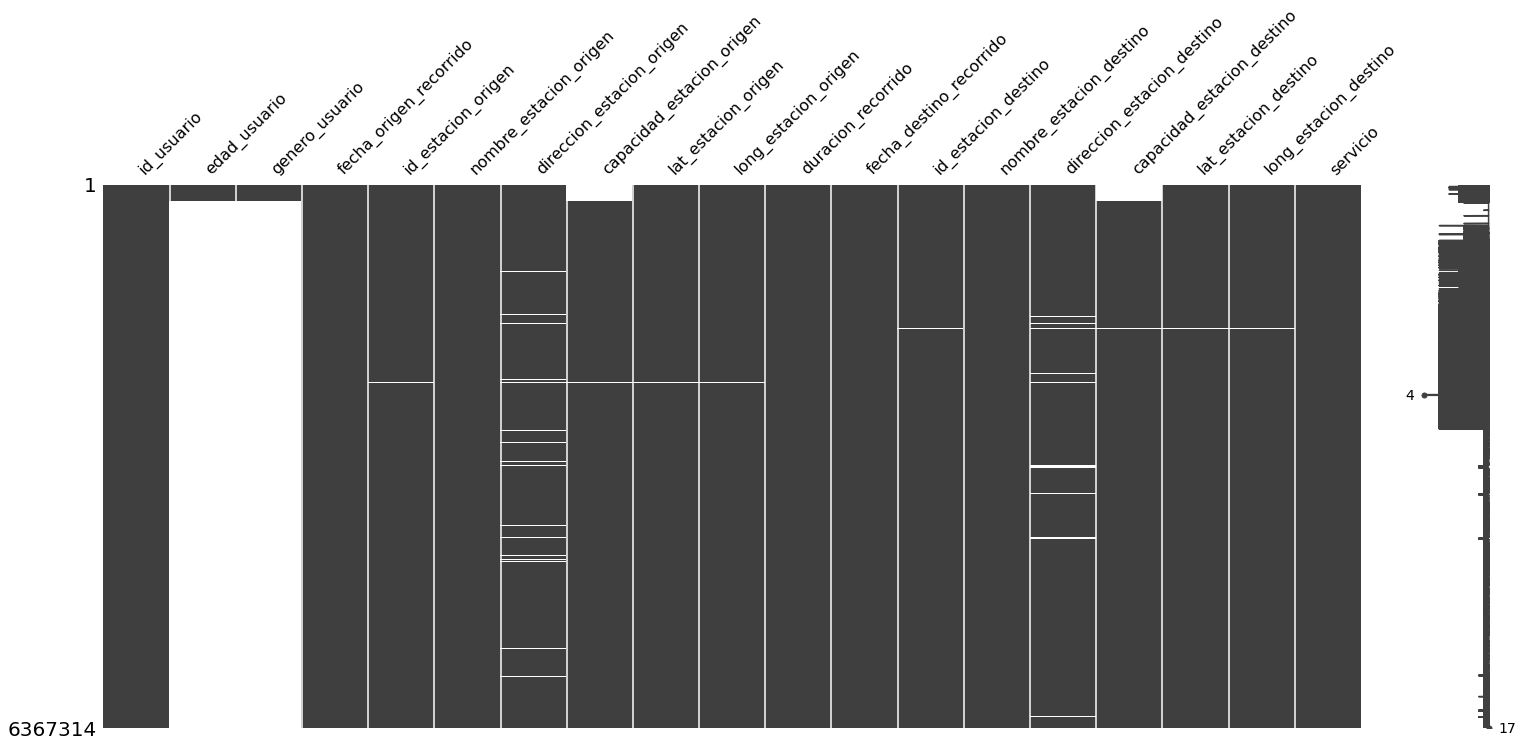

In [6]:
msno.matrix(df)

<AxesSubplot:>

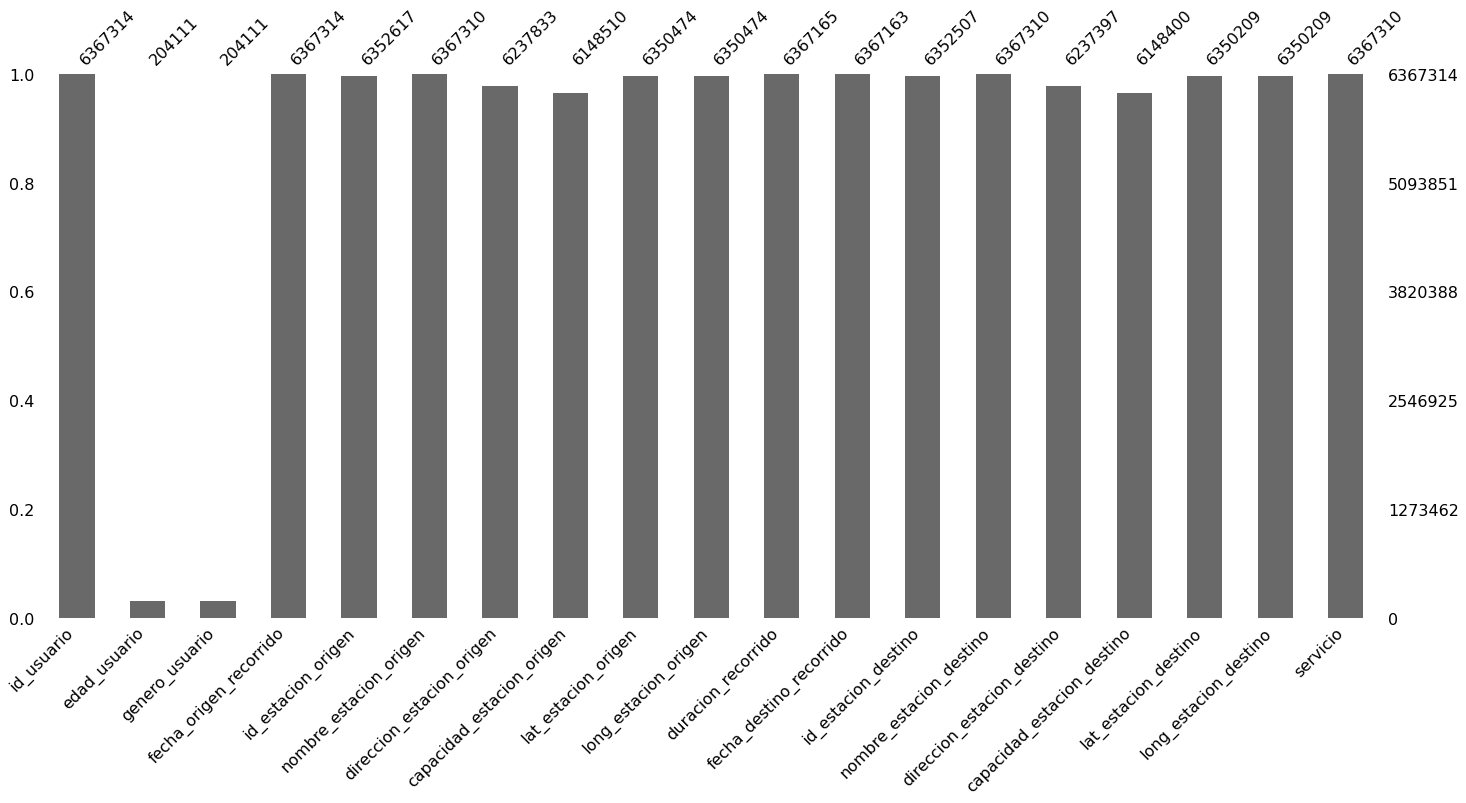

In [7]:
msno.bar(df)

The edad_usuario and genero_usuario columns have a high number of missing values. 

Let's use the heatmap function of missingno library to identify if there is any correlation between missing values in different columns.

<AxesSubplot:>

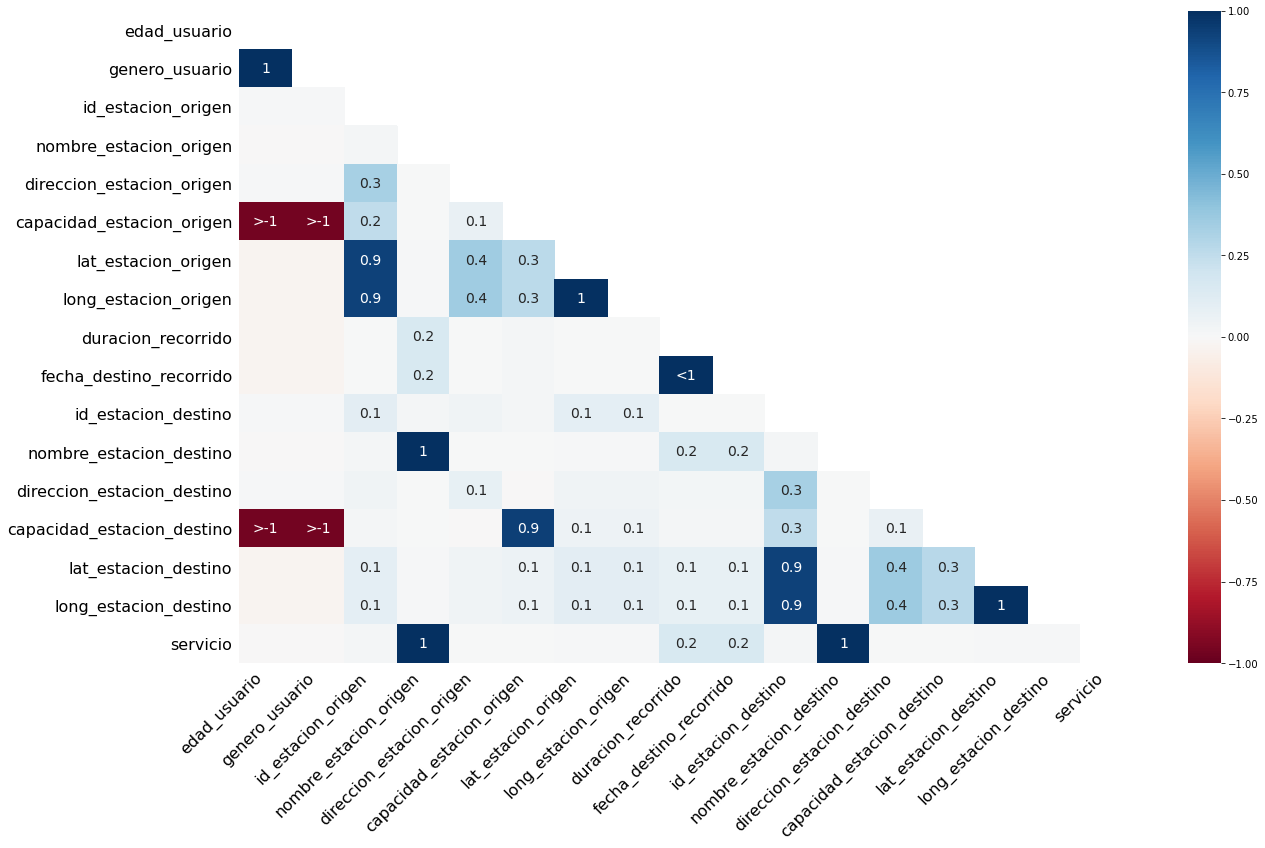

In [8]:
msno.heatmap(df)

From the chart I can say that _longitud_ and _latitude_ columns are related with _id_estacion._ This makes sense because if we don't know which station is we can't infer its address. The same happens with _fecha_ and _duracion_ columns because if one of them is missing we can't calculate the other one.

Something interesting it is happening between _edad_usuario_,  _genero_usuario_  and _capacidad_ columns. If one appears, the other is very likely to be missing. The first two are related with the user and the last with the station and according to the matrix chart, _genero_usuario_ and _edad_usuario_ only appears in the first entries and for _capacidad_ is exactly the opposite. Probably, it is connected whit the renovation of the Ecobici system.

### Data Cleaning

The columns that represent detail information about other variables will be removed. This is the case of the following features:

- direccion_estacion_origen
- direccion_estacion_destino

The variables nombre_estacion_origen and nombre_estacion_destino will be used to fill missing values on id_estacion and capacidad_estacion with the help of an auxiliary data set.

In [9]:
df.drop(['direccion_estacion_origen', 'direccion_estacion_destino'], axis=1, inplace=True)

Those variables with very high number of missing values should be droped. This is the case of:

- edad_usuario
- genero_usuario


In [10]:
df.drop(['edad_usuario', 'genero_usuario'], axis=1, inplace=True)

Those variables with no relevant information will be droped too. This is the case of _servicio_

In [11]:
df.drop('servicio', axis=1, inplace=True)

#### id_usuario

According to the warning generated in cell 2 it is probably that _id_usuario_ has different data types. 

In [12]:
df['id_usuario'].unique()

array(['115783_0', '345364_0', '570578_0', ..., 494906, 618404, 606607],
      dtype=object)

In [13]:
df['id_usuario'] = df['id_usuario'].astype('str')

In [14]:
df['id_usuario'] = df['id_usuario'].str.replace('_','.')

In [15]:
df['id_usuario'] = df['id_usuario'].astype('float64').astype('int64')

#### Datetime

I need _fecha_origen_recorrido_ column to be a datetime object. First, I will evaluate if this column has values which not represent a date.

In [16]:
df[~df['fecha_origen_recorrido'].str.startswith('2019')]

,id_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino
2459356,130849,nuevo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461804,130849,nuevo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464252,130849,nuevo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2466700,130849,nuevo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I will drop those entries because they have no information.

In [17]:
df.drop(df[df['fecha_origen_recorrido']=='nuevo'].index, inplace=True)

In [18]:
df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'])

The _fecha_destino_recorrido_ columns has missing values. I should review those entries.

In [23]:
from qgrid import show_grid

In [24]:
show_grid(df[df['fecha_destino_recorrido'].isnull()==True])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Most of those entries have no information about destination. The rows which have values in destination have no data for duration. Probably those rides have never been taken. I will droped them.

In [25]:
df.drop(df[df['fecha_destino_recorrido'].isnull()==True].index, inplace=True)

In [27]:
df['fecha_destino_recorrido'] = pd.to_datetime(df['fecha_destino_recorrido'])

#### id_estacion

Some entries have missing values in _id_estacion_origen_ and _id_estacion_destino_ columns.  

In [28]:
df[df['id_estacion_origen'].isnull()==True]['nombre_estacion_origen'].value_counts()

Ingeniero Butty                       4945
Plaza De Los Periodistas              4416
Agronomia                             2668
Ministerio De Justicia Y Seguridad    1825
Off Braudacco                          808
Depósito                                22
Ex Parque Avellaneda Ii                  9
Name: nombre_estacion_origen, dtype: int64

In [29]:
df[df['id_estacion_destino'].isnull()==True]['nombre_estacion_destino'].value_counts()

Ingeniero Butty                       4876
Plaza De Los Periodistas              4466
Agronomia                             2669
Ministerio De Justicia Y Seguridad    1821
Off Braudacco                          818
Depósito                               117
Armazém                                 16
Balboa Definitivo                       10
Ex Parque Avellaneda Ii                 10
Name: nombre_estacion_destino, dtype: int64

Those trips whose station of origin or destination is the "Depósito" will be eliminated since they do not correspond to real trips made by users.

In [30]:
df.drop(df[df['nombre_estacion_origen']=='Depósito'].index, inplace=True)

In [31]:
df.drop(df[df['nombre_estacion_destino']=='Depósito'].index, inplace=True)

To replace the missing values I will use an auxiliary data set with information about the stations provided by the open data portal of the City of Buenos Aires.

In [32]:
sta_nuevo = pd.read_csv(r"nuevas-estaciones-bicicletas-publicas.csv")

In [33]:
sta_nuevo.columns

Index(['lat', 'long', 'nombre_estacion', 'id_estacion', 'capacidad',
       'dirección_completa', 'direccion_nombre', 'direccion_altura',
       'direccion_interseccion', 'barrio'],
      dtype='object')

In [34]:
sta_nuevo[sta_nuevo['nombre_estacion'].str.lower().str.contains('Ingeniero Butty'.lower())]

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
24,-34.596425,-58.371847,035 - INGENIERO BUTTY,35,20,Ing. E. Butty 291,Ing. E. Butty,291.0,NaN,Retiro


In [35]:
df.loc[df['nombre_estacion_origen']=='Ingeniero Butty','id_estacion_origen'] = '35.0'

In [36]:
df.loc[df['nombre_estacion_destino']=='Ingeniero Butty','id_estacion_destino'] = '35.0'

In [37]:
sta_nuevo[sta_nuevo['nombre_estacion'].str.lower().str.contains('Ministerio De Justicia Y Seguridad'.lower())]

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
81,-34.640267,-58.369224,126 - Ministerio de Justicia y Seguridad,126,16,Regimiento De Patricios Av. & Araoz De Lamadri...,Regimiento De Patricios Av.,NaN,"Araoz De Lamadrid, Gregorio, Gral.",Boca


In [38]:
df.loc[df['nombre_estacion_origen']=='Ministerio De Justicia Y Seguridad','id_estacion_origen'] = '126.0'

In [39]:
df.loc[df['nombre_estacion_destino']=='Ministerio De Justicia Y Seguridad','id_estacion_destino'] = '126.0'

The other stations with no values are not found in the station dataset. They were probably deleted or have changed their ID. Since they have not information on location and / or capacity, they will not be useful for the analysis. On the other hand they represent a very small percentage of trips. Therefore, I will eliminate those entries.

In [40]:
vacio_origen = df[df['id_estacion_origen'].isnull()==True]['nombre_estacion_origen'].unique().tolist()

In [41]:
for i in vacio_origen:
    df.drop(df[df['nombre_estacion_origen']==i].index, inplace=True)

In [42]:
vacio_destino = df[df['id_estacion_destino'].isnull()==True]['nombre_estacion_destino'].unique().tolist()

In [43]:
for i in vacio_destino:
    df.drop(df[df['nombre_estacion_destino']==i].index, inplace=True)

According to the legend generated when I loaded the dataset, it is likely that the variable contains data that does not represent a number or has data of different types (object/float/int).

In [44]:
df['id_estacion_origen'] = df['id_estacion_origen'].astype('str') 

In [45]:
df[~df['id_estacion_origen'].str.contains(pat='[.]')].head()

,id_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino
12,533267,2019-01-01 00:49:12,159_0,Fitz Roy y Gorriti,NaN,NaN,NaN,0 days 00:19:42.000000000,2019-01-01 01:08:54,127.0,Santos Dumont y Otero,NaN,-34.592212,-58.452927
126,377910,2019-01-01 06:56:26,159_0,Fitz Roy y Gorriti,NaN,NaN,NaN,0 days 00:54:48.000000000,2019-01-01 07:51:14,6.0,Parque Lezama,NaN,-34.628301,-58.369709
320,414003,2019-01-01 14:09:49,44_0,Ecoparque,NaN,NaN,NaN,0 days 00:05:13.000000000,2019-01-01 14:15:02,44_0,Ecoparque,NaN,NaN,NaN
345,493515,2019-01-01 14:36:05,159_0,Fitz Roy y Gorriti,NaN,NaN,NaN,0 days 00:19:24.000000000,2019-01-01 14:55:29,50.0,Hospital Rivadavia,NaN,-34.583677,-58.401148
349,218398,2019-01-01 14:39:57,44_0,Ecoparque,NaN,NaN,NaN,0 days 00:05:14.000000000,2019-01-01 14:45:11,44_0,Ecoparque,NaN,NaN,NaN


In [46]:
df[~df['id_estacion_origen'].str.contains(pat='[.]')]['id_estacion_origen'].unique()

array(['159_0', '44_0'], dtype=object)

In [47]:
df['id_estacion_origen'].replace('159_0', '159.0', inplace=True)

In [48]:
df['id_estacion_origen'].replace('44_0', '44.0', inplace=True)

In [49]:
df['id_estacion_origen'] = df['id_estacion_origen'].astype('float64').astype('int64') 

In [50]:
df['id_estacion_destino'] = df['id_estacion_destino'].astype('str') 

In [51]:
df[~df['id_estacion_destino'].str.contains(pat='[.]')]['id_estacion_destino'].unique()

array(['44_0', '159_0'], dtype=object)

In [52]:
df['id_estacion_destino'].replace('44_0', '44.0', inplace=True)

In [53]:
df['id_estacion_destino'].replace('159_0', '159.0', inplace=True)

In [54]:
df.drop(df[df['id_estacion_destino']=='_0'].index, inplace=True)

In [55]:
df['id_estacion_destino'] = df['id_estacion_destino'].astype('float64').astype('Int64')

In [56]:
df.drop(['nombre_estacion_origen', 'nombre_estacion_destino'], axis=1, inplace=True)

#### capacidad_estacion

Both capacity columns have empty values. I will analyze which are the stations with missing data.

In [58]:
df.groupby('id_estacion_origen')['capacidad_estacion_origen'].unique().head()

id_estacion_origen
1          [nan]
2    [nan, 20.0]
3         [20.0]
4    [nan, 20.0]
5    [nan, 42.0]
Name: capacidad_estacion_origen, dtype: object

In [59]:
capacidad = df.dropna(subset=['capacidad_estacion_origen'])[['id_estacion_origen','capacidad_estacion_origen']]

In [60]:
capacidad = capacidad.drop_duplicates()

In [61]:
capacidad_dict = dict(capacidad.values.tolist())

In [62]:
df['capacidad_estacion_origen'] = df['id_estacion_origen'].map(capacidad_dict)

In [63]:
df['capacidad_estacion_destino'] = df['id_estacion_destino'].map(capacidad_dict)

In [64]:
df[df['capacidad_estacion_origen'].isnull()]['id_estacion_origen'].unique()

array([ 16, 129, 142, 159, 160,  34,  35,  18, 147,  61, 139,   1, 123,
       140, 157,  97, 113, 145, 103, 136, 100, 109, 178,  67,  37, 133,
       125], dtype=int64)

In [65]:
sta_nuevo[sta_nuevo['id_estacion']==35]

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
24,-34.596425,-58.371847,035 - INGENIERO BUTTY,35,20,Ing. E. Butty 291,Ing. E. Butty,291.0,NaN,Retiro


In [66]:
df.loc[df['id_estacion_origen']==35,'capacidad_estacion_origen']=20

In [67]:
df.loc[df['id_estacion_destino']==35,'capacidad_estacion_destino']=20

In [68]:
cap_null = df[df['capacidad_estacion_origen'].isnull()]

In [69]:
cap_null = cap_null.set_index('fecha_origen_recorrido')

In [70]:
cap_null.groupby(by=cap_null.index.month)['id_estacion_origen'].count()

fecha_origen_recorrido
1    19861
2    12253
Name: id_estacion_origen, dtype: int64

Stations with missign data were only used in the months of January and February 2019. Probably the ols system did not record information about capacity.

#### lat_estacion and long_estacion

In [71]:
df[df['lat_estacion_origen'].isna()]['id_estacion_origen'].unique()

array([159,  44,  35, 126], dtype=int64)

In [72]:
df[df['id_estacion_origen']==126]['lat_estacion_origen'].unique()

array([-34.6402672,         nan])

In [73]:
df[df['id_estacion_origen']==44]['lat_estacion_origen'].unique()

array([        nan, -34.5755148])

In [74]:
df[df['id_estacion_origen']==35]['lat_estacion_origen'].unique()

array([-34.59632739,          nan])

In [75]:
df.loc[df['id_estacion_origen']==44,'lat_estacion_origen']=-34.5755148
df.loc[df['id_estacion_origen']==35,'lat_estacion_origen']=-34.59632739
df.loc[df['id_estacion_origen']==126,'lat_estacion_origen']=-34.6402672

In [76]:
df[df['lat_estacion_destino'].isna()]['id_estacion_destino'].unique()

<IntegerArray>
[44, 159, 35, 126]
Length: 4, dtype: Int64

In [77]:
df.loc[df['id_estacion_destino']==44,'lat_estacion_destino']=-34.5755148
df.loc[df['id_estacion_destino']==35,'lat_estacion_destino']=-34.59632739
df.loc[df['id_estacion_destino']==126,'lat_estacion_destino']=-34.6402672

In [78]:
df[df['long_estacion_origen'].isna()]['id_estacion_origen'].unique()

array([159,  44,  35, 126], dtype=int64)

In [79]:
df[df['id_estacion_origen']==126]['long_estacion_origen'].unique()

array([-58.3692243,         nan])

In [80]:
df[df['id_estacion_origen']==44]['long_estacion_origen'].unique()

array([        nan, -58.4138829, -58.4138829])

In [81]:
df[df['id_estacion_origen']==35]['long_estacion_origen'].unique()

array([-58.37185787,          nan])

In [82]:
df.loc[df['id_estacion_origen']==126,'long_estacion_origen']=-58.3692243
df.loc[df['id_estacion_origen']==35,'long_estacion_origen']=-58.37185787
df.loc[df['id_estacion_origen']==44,'long_estacion_origen']=-58.4138829

In [83]:
df[df['lat_estacion_destino'].isna()]['id_estacion_destino'].unique()

<IntegerArray>
[159]
Length: 1, dtype: Int64

In [84]:
df.loc[df['id_estacion_destino']==126,'long_estacion_destino']=-58.3692243
df.loc[df['id_estacion_destino']==35,'long_estacion_destino']=-58.37185787
df.loc[df['id_estacion_destino']==44,'long_estacion_destino']=-58.4138829

In [85]:
df['lat_estacion_origen'] = np.round(df['lat_estacion_origen'],6)
df['lat_estacion_destino'] = np.round(df['lat_estacion_destino'],6)
df['long_estacion_origen'] = np.round(df['long_estacion_origen'],6)
df['long_estacion_destino'] = np.round(df['long_estacion_destino'],6)

#### duracion_recorrido

For a better analysis of the data, I will convert the variable ride duration in seconds.

In [86]:
df['duracion_recorrido'] = pd.to_timedelta(df['duracion_recorrido'])

In [87]:
df['duracion_recorrido'] = np.round(df['duracion_recorrido'].dt.total_seconds(),0)

In [93]:
df['duracion_recorrido'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99])

count    6.352334e+06
mean     2.022891e+03
std      1.879189e+04
min      0.000000e+00
1%       1.130000e+02
10%      3.940000e+02
25%      6.460000e+02
50%      1.154000e+03
75%      2.084000e+03
99%      1.053700e+04
max      1.217354e+07
Name: duracion_recorrido, dtype: float64

It does not make sense that someone take a ride for a less than 2 minutes. If we assume a mean velocity of 200m/min, in 2 minutes we can travel only 4 blocks. I will drop those 1% entries.

In [104]:
df.drop(df[df['duracion_recorrido']<=113].index, axis=0, inplace=True)

There are trips with an exorbitant duration, probably corresponding to bicycle repairs or some improper use of the system. I will drop those entries which duration trip are equal or higher than the 99 percentile. I will treat them as outliers.

In [105]:
df.drop(df[df['duracion_recorrido']>=10537].index, axis=0, inplace=True)

I will download the cleaned dataset for future analysis

In [106]:
df.to_csv('ecobici_2019_v1.csv', index=False)